In [7]:
import numpy as np
import matplotlib.pyplot as plt

data_train_x = np.load('data/data_X.npy')
data_train_y = np.load('data/data_y.npy')
data_eval_x = np.load('data/data_Xval.npy')
data_eval_y = np.load('data/data_yval.npy')

print(data_train_x.shape, data_train_y.shape, data_eval_x.shape, data_eval_y.shape)
data_train_y[:5]

(211, 2) (211, 1) (200, 2) (200, 1)


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

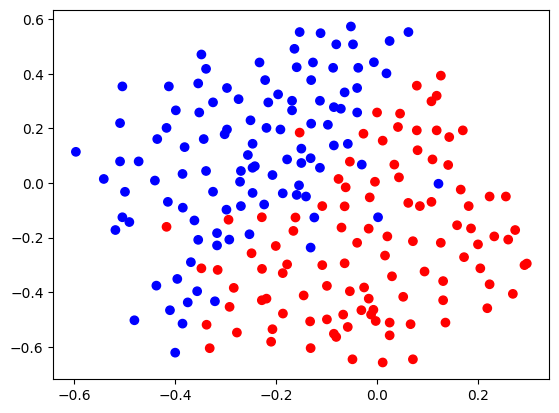

In [8]:
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors)

In [9]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [10]:
import keras

model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

In [11]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(data_train_x, data_train_y,
                    epochs=10, batch_size=32,
                    validation_data=(data_eval_x, data_eval_y))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 497ms/step - accuracy: 0.6175 - loss: 0.5566 - val_accuracy: 0.8950 - val_loss: 0.4606
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 460ms/step - accuracy: 0.9099 - loss: 0.3064 - val_accuracy: 0.9350 - val_loss: 0.2679
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 459ms/step - accuracy: 0.9057 - loss: 0.2647 - val_accuracy: 0.9250 - val_loss: 0.2930
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 460ms/step - accuracy: 0.9152 - loss: 0.2310 - val_accuracy: 0.9250 - val_loss: 0.2795
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 460ms/step - accuracy: 0.9205 - loss: 0.2247 - val_accuracy: 0.9250 - val_loss: 0.2724
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.9139 - loss: 0.2401 - val_accuracy: 0.9200 - val_loss: 0.3138
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.9437 - loss: 0.1766 - val_accuracy: 0.9250 - val_loss: 0.3099
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 461ms/step - accuracy: 0.9588 - loss: 0.1427 - val_accuracy: 0.9200 - val_loss:

In [14]:
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(train_loss) + 1)
    
    fig, axs = plt.subplots(2, figsize=(10, 7))
    fig.suptitle('Training and Validation Metrics')
    
    axs[0].plot(epochs, train_loss, label='Training loss', c='red')
    axs[0].plot(epochs, val_loss, label='Validation loss', c='blue')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].set_ylim([0, 1.5])
    
    axs[1].plot(epochs, train_acc, label='Training accuracy', c='red')
    axs[1].plot(epochs, val_acc, label='Validation accuracy', c='blue')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()

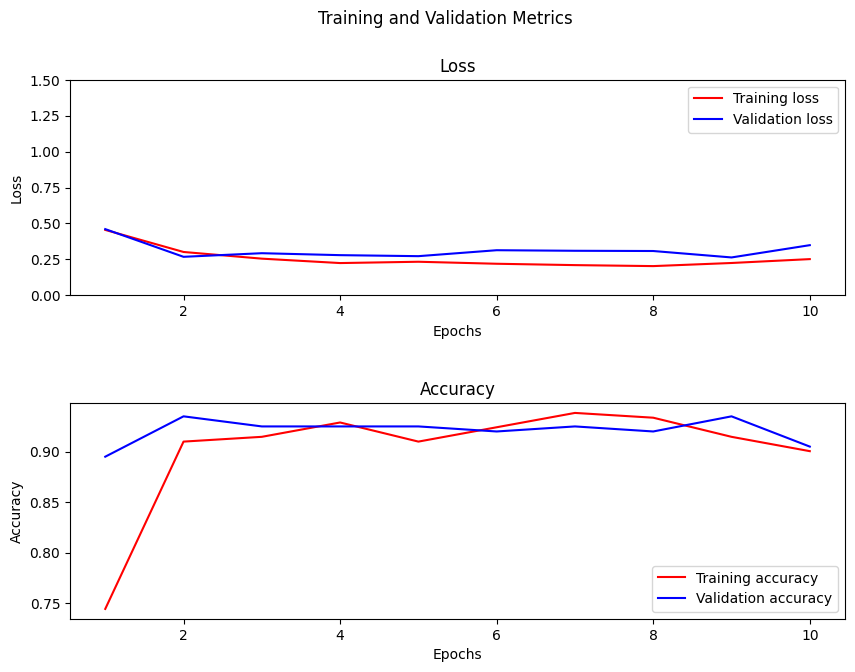

In [15]:
plot_loss_acc(history)

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

def get_decision_boundaries(model, xmin, xmax, ymin, ymax, steps):
  x_span = np.linspace(xmin, xmax, steps)
  y_span = np.linspace(ymin, ymax, steps)
  xx, yy = np.meshgrid(x_span, y_span)
  points = (np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32))

  z = (model.predict(np.c_[xx.ravel(), yy.ravel()])>0.5).reshape(xx.shape)

  return xx, yy, z

def plt_decision_boundaries(model, x_min, x_max, y_min, y_max, steps):
  plt.figure(figsize=(6, 4))
  xx, yy, z = get_decision_boundaries(model, x_min, x_max, y_min, y_max, steps)
  plt.contourf(xx, yy, z, alpha=0.2, cmap=matplotlib.colors.ListedColormap(["C1", "C0"]));


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


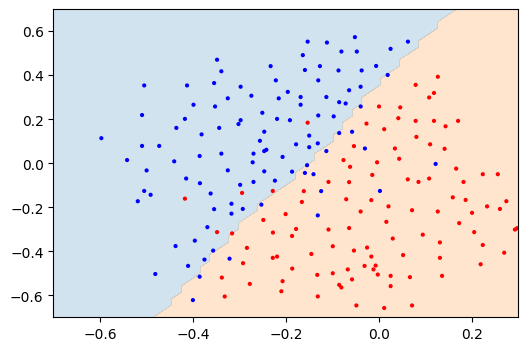

In [17]:
plt_decision_boundaries(model, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()

In [18]:
model_dropout = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(.6),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(.6),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(.6),
    keras.layers.Dense(1, activation='sigmoid')])

In [19]:
model_dropout.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model_dropout.fit(data_train_x, data_train_y,
                            epochs=10, batch_size=32,
                            validation_data=(data_eval_x, data_eval_y))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - accuracy: 0.6495 - loss: 0.5927 - val_accuracy: 0.9050 - val_loss: 0.4139
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accuracy: 0.9021 - loss: 0.3320 - val_accuracy: 0.9300 - val_loss: 0.3495
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - accuracy: 0.8732 - loss: 0.3025 - val_accuracy: 0.9200 - val_loss: 0.2935
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 458ms/step - accuracy: 0.9274 - loss: 0.2024 - val_accuracy: 0.8950 - val_loss: 0.3546
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 459ms/step - accuracy: 0.8918 - loss: 0.2688 - val_accuracy: 0.9250 - val_loss: 0.2853
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 458ms/step - accuracy: 0.9260 - loss: 0.2585 - val_accuracy: 0.9100 - val_loss: 0.3301
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 457ms/step - accuracy: 0.9158 - loss: 0.2362 - val_accuracy: 0.9250 - val_loss: 0.3108
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 456ms/step - accuracy: 0.9204 - loss: 0.2177 - val_accuracy: 0.9100 - val_loss:

In [21]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

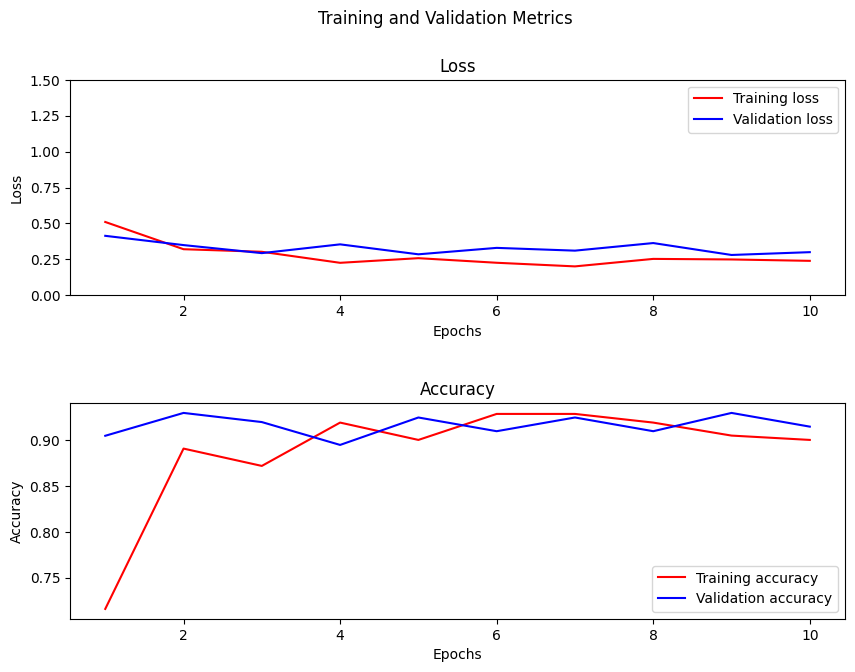

In [22]:
plot_loss_acc(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


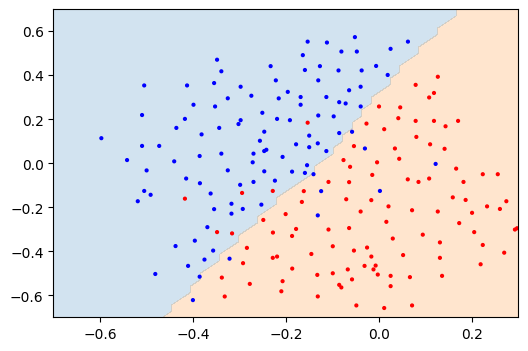

In [23]:
plt_decision_boundaries(model_dropout, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()

In [24]:
reg = keras.regularizers.L1L2(l1=3e-5, l2=3e-4)
model_l1l2 = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=reg),
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=reg),
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=reg),
    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=reg)
    ])

In [25]:
model_l1l2.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
model_l1l2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 5000)           │        15,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5000)           │    25,005,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5000)           │    25,005,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │         5,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,030,001 (190.85 MB)

 Trainable params: 50,030,001 (190.85 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model_l1l2.fit(data_train_x, data_train_y,
                         epochs=10, batch_size=32,
                         validation_data=(data_eval_x, data_eval_y))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 847ms/step - accuracy: 0.7883 - loss: 19.4468 - val_accuracy: 0.8850 - val_loss: 11.8659
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 857ms/step - accuracy: 0.9079 - loss: 10.1407 - val_accuracy: 0.8550 - val_loss: 5.7951
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 843ms/step - accuracy: 0.9165 - loss: 4.7797 - val_accuracy: 0.9350 - val_loss: 2.6699
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 878ms/step - accuracy: 0.9335 - loss: 2.3997 - val_accuracy: 0.9100 - val_loss: 2.1347
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 908ms/step - accuracy: 0.9387 - loss: 1.9587 - val_accuracy: 0.9300 - val_loss: 1.4577
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 895ms/step - accuracy: 0.9249 - loss: 1.3305 - val_accuracy: 0.9300 - val_loss: 1.0301
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 900ms/step - accuracy: 0.9368 - loss: 0.9696 - val_accuracy: 0.9350 - val_loss: 0.7935
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 856ms/step - accuracy: 0.9224 - loss: 0.7761 - val_accuracy: 0.9350 - val_lo

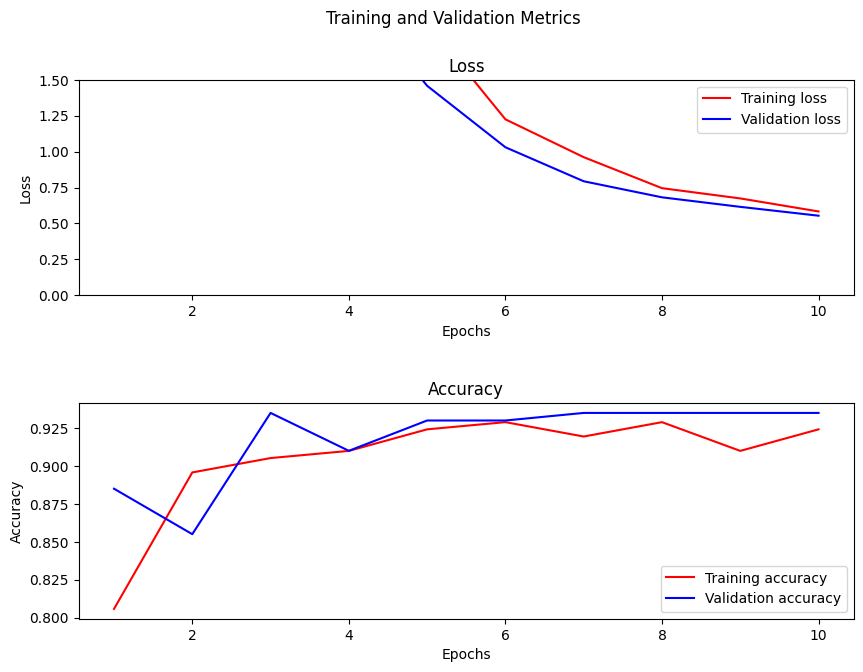

In [28]:
plot_loss_acc(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


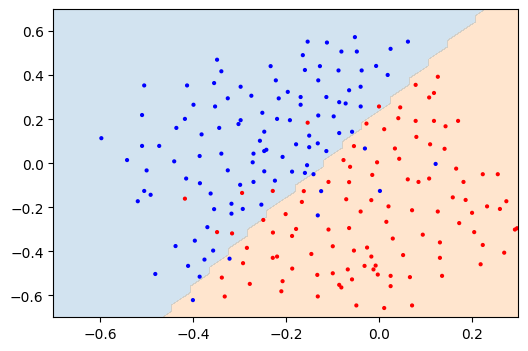

In [29]:
plt_decision_boundaries(model_l1l2, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()